In [40]:
#import pyCGM.metrics as cgm
import pandas as pd
import numpy as np
import copy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import sys
sys.path.append("/Users/cr591/OneDrive - University of Exeter/Desktop/pyCGM/pyCGM")
import metrics as cgm
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
from scipy.interpolate import interp1d

In [41]:
import warnings
warnings.filterwarnings('ignore')

from datetime import timedelta as time
fift_mins = time(minutes=15)
thirt_mins = time(minutes=30)

In [42]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [29]:
#df = pd.read_csv('./dexcom_data_interpolated.csv')

In [43]:
df = pd.read_csv('~/OneDrive - University of Exeter/Desktop/PhD/Projects/interpolation-for-hypo-detection/dexcom-maths-exploration/data/tidy_data/interp_dataset.csv')

In [7]:
cols = ['cut_glc',  'cut_glc_linear', 'cut_glc_pchip', 
        'cut_glc_spline', 'cut_glc_akima', 'cut_glc_poly_3', 'cut_glc_poly_5'] #, 'cut_glc_poly_7']
df[cols] = df[cols].round(2)

In [225]:
df.head()

time   glc            ID  cut_glc  glc_linear  glc_pchip  \
0 2019-12-17 13:15:00  4.83  2036_6months     4.83        4.83       4.83   
1 2019-12-17 13:20:00  4.94  2036_6months      NaN        4.94       4.94   
2 2019-12-17 13:25:00  4.77  2036_6months      NaN        4.77       4.77   
3 2019-12-17 13:30:00  4.83  2036_6months     4.83        4.83       4.83   
4 2019-12-17 13:35:00  4.88  2036_6months      NaN        4.88       4.88   

   glc_spline  glc_akima  glc_cubic  glc_quadratic  glc_piece_poly  \
0        4.83       4.83       4.83           4.83            4.83   
1        4.94       4.94       4.94           4.94            4.94   
2        4.77       4.77       4.77           4.77            4.77   
3        4.83       4.83       4.83           4.83            4.83   
4        4.88       4.88       4.88           4.88            4.88   

   glc_poly_5  glc_poly_3  glc_spline_5  glc_spline_3  cut_glc_linear  \
0        4.83        4.83          4.83          4.83            4.83   
1        4.94        4.94          4.94          4.94            4.83   
2        4.77        4.77          4.77          4.77            4.83   
3        4.83        4.83          4.83          4.83            4.83   
4        4.88        4.88          4.88          4.88            4.92   

   cut_glc_pchip  cut_glc_spline  cut_glc_akima  cut_glc_cubic  \
0           4.83            4.83           4.83       4.830000   
1           4.83            4.75           4.80       4.749595   
2           4.83            4.76           4.79       4.759454   
3           4.83            4.83           4.83       4.830000   
4           4.89            4.93           4.92       4.931657   

   cut_glc_quadratic  cut_glc_piece_poly  cut_glc_poly_5  cut_glc_poly_3  \
0           4.830000            4.830000            4.83            4.83   
1           4.788684            4.830000            4.52            4.75   
2           4.788684            4.830000            4.61            4.76   
3           4.830000            4.830000            4.83            4.83   
4           4.912631            4.923333            5.01            4.93   

   cut_glc_spline_5  cut_glc_spline_3  
0          4.830000          4.830000  
1          4.178436          5.071741  
2          4.496114          5.076072  
3          4.830000          4.830000  
4          5.030420          5.099624

In [44]:
df['time'] = pd.to_datetime(df['time'])

## 1 hypo 15 mins, 2 hypos 5 mins

In [346]:
sub_df1.head()

time   glc             ID  cut_glc  glc_linear  \
604415 2018-03-08 21:00:00   NaN  2028_baseline      NaN       5.314   
604416 2018-03-08 21:01:00   NaN  2028_baseline      NaN       5.226   
604417 2018-03-08 21:02:00   NaN  2028_baseline      NaN       5.138   
604418 2018-03-08 21:03:00  5.05  2028_baseline      NaN       5.050   
604419 2018-03-08 21:04:00   NaN  2028_baseline      NaN       4.950   

        glc_pchip  glc_spline  glc_akima  glc_poly_5  glc_poly_3  \
604415   5.332694    5.329728   5.329374    5.332788    5.329728   
604416   5.240710    5.241320   5.239289    5.244934    5.241320   
604417   5.145150    5.147942   5.145470    5.150475    5.147942   
604418   5.050000    5.050000   5.050000    5.050000    5.050000   
604419   4.952108    4.948254   4.951056    4.945306    4.948254   

        cut_glc_linear  cut_glc_pchip  cut_glc_spline  cut_glc_akima  \
604415            5.31           5.36            5.36           5.37   
604416            5.22           5.28            5.28           5.30   
604417            5.14           5.21            5.21           5.22   
604418            5.05           5.12            5.13           5.13   
604419            4.96           5.04            5.06           5.05   

        cut_glc_poly_5  cut_glc_poly_3  
604415            5.35            5.36  
604416            5.28            5.28  
604417            5.20            5.21  
604418            5.13            5.13  
604419            5.05            5.06

In [34]:
sub_df

Unnamed: 0            ID                time   glc  cut_glc  pchip  \
865461      865461  1004_6months 2018-09-18 19:15:00   NaN      NaN   4.62   
865462      865462  1004_6months 2018-09-18 19:16:00  4.50      NaN   4.60   
865463      865463  1004_6months 2018-09-18 19:17:00   NaN      NaN   4.58   
865464      865464  1004_6months 2018-09-18 19:18:00   NaN      NaN   4.56   
865465      865465  1004_6months 2018-09-18 19:19:00   NaN      NaN   4.54   
865466      865466  1004_6months 2018-09-18 19:20:00   NaN      NaN   4.52   
865467      865467  1004_6months 2018-09-18 19:21:00  4.50     4.50   4.50   
865468      865468  1004_6months 2018-09-18 19:22:00   NaN      NaN   4.48   
865469      865469  1004_6months 2018-09-18 19:23:00   NaN      NaN   4.46   
865470      865470  1004_6months 2018-09-18 19:24:00   NaN      NaN   4.45   
865471      865471  1004_6months 2018-09-18 19:25:00   NaN      NaN   4.43   
865472      865472  1004_6months 2018-09-18 19:26:00  4.33      NaN   4.42   
865473      865473  1004_6months 2018-09-18 19:27:00   NaN      NaN   4.40   
865474      865474  1004_6months 2018-09-18 19:28:00   NaN      NaN   4.39   
865475      865475  1004_6months 2018-09-18 19:29:00   NaN      NaN   4.37   
865476      865476  1004_6months 2018-09-18 19:30:00   NaN      NaN   4.36   
865477      865477  1004_6months 2018-09-18 19:31:00  4.05      NaN   4.34   
865478      865478  1004_6months 2018-09-18 19:32:00   NaN      NaN   4.32   
865479      865479  1004_6months 2018-09-18 19:33:00   NaN      NaN   4.30   
865480      865480  1004_6months 2018-09-18 19:34:00   NaN      NaN   4.27   
865481      865481  1004_6months 2018-09-18 19:35:00   NaN      NaN   4.25   
865482      865482  1004_6months 2018-09-18 19:36:00  4.22     4.22   4.22   
865483      865483  1004_6months 2018-09-18 19:37:00   NaN      NaN   4.18   
865484      865484  1004_6months 2018-09-18 19:38:00   NaN      NaN   4.12   
865485      865485  1004_6months 2018-09-18 19:39:00   NaN      NaN   4.05   
865486      865486  1004_6months 2018-09-18 19:40:00   NaN      NaN   3.96   
865487      865487  1004_6months 2018-09-18 19:41:00  3.94      NaN   3.87   
865488      865488  1004_6months 2018-09-18 19:42:00   NaN      NaN   3.77   
865489      865489  1004_6months 2018-09-18 19:43:00   NaN      NaN   3.66   
865490      865490  1004_6months 2018-09-18 19:44:00   NaN      NaN   3.55   
865491      865491  1004_6months 2018-09-18 19:45:00   NaN      NaN   3.44   
865492      865492  1004_6months 2018-09-18 19:46:00  3.39      NaN   3.33   
865493      865493  1004_6months 2018-09-18 19:47:00   NaN      NaN   3.23   
865494      865494  1004_6months 2018-09-18 19:48:00   NaN      NaN   3.14   
865495      865495  1004_6months 2018-09-18 19:49:00   NaN      NaN   3.06   
865496      865496  1004_6months 2018-09-18 19:50:00   NaN      NaN   2.99   
865497      865497  1004_6months 2018-09-18 19:51:00  2.94     2.94   2.94   
865498      865498  1004_6months 2018-09-18 19:52:00   NaN      NaN   2.90   
865499      865499  1004_6months 2018-09-18 19:53:00   NaN      NaN   2.85   
865500      865500  1004_6months 2018-09-18 19:54:00   NaN      NaN   2.81   
865501      865501  1004_6months 2018-09-18 19:55:00   NaN      NaN   2.77   
865502      865502  1004_6months 2018-09-18 19:56:00  2.66      NaN   2.73   
865503      865503  1004_6months 2018-09-18 19:57:00   NaN      NaN   2.69   
865504      865504  1004_6months 2018-09-18 19:58:00   NaN      NaN   2.66   
865505      865505  1004_6months 2018-09-18 19:59:00   NaN      NaN   2.62   
865506      865506  1004_6months 2018-09-18 20:00:00   NaN      NaN   2.59   
865507      865507  1004_6months 2018-09-18 20:01:00  2.55      NaN   2.57   
865508      865508  1004_6months 2018-09-18 20:02:00   NaN      NaN   2.54   
865509      865509  1004_6months 2018-09-18 20:03:00   NaN      NaN   2.52   
865510      865510  1004_6months 2018-09-18 20:04:00   NaN      NaN   2.51   
865511      865511  1004_6mont

In [35]:
sub_df_5

Unnamed: 0            ID                time   glc  cut_glc  pchip  \
865462      865462  1004_6months 2018-09-18 19:16:00  4.50      NaN   4.60   
865467      865467  1004_6months 2018-09-18 19:21:00  4.50     4.50   4.50   
865472      865472  1004_6months 2018-09-18 19:26:00  4.33      NaN   4.42   
865477      865477  1004_6months 2018-09-18 19:31:00  4.05      NaN   4.34   
865482      865482  1004_6months 2018-09-18 19:36:00  4.22     4.22   4.22   
865487      865487  1004_6months 2018-09-18 19:41:00  3.94      NaN   3.87   
865492      865492  1004_6months 2018-09-18 19:46:00  3.39      NaN   3.33   
865497      865497  1004_6months 2018-09-18 19:51:00  2.94     2.94   2.94   
865502      865502  1004_6months 2018-09-18 19:56:00  2.66      NaN   2.73   
865507      865507  1004_6months 2018-09-18 20:01:00  2.55      NaN   2.57   
865512      865512  1004_6months 2018-09-18 20:06:00  2.50     2.50   2.50   
865517      865517  1004_6months 2018-09-18 20:11:00  2.22      NaN   2.51   
865522      865522  1004_6months 2018-09-18 20:16:00  2.22      NaN   2.55   
865527      865527  1004_6months 2018-09-18 20:21:00  2.61     2.61   2.61   
865532      865532  1004_6months 2018-09-18 20:26:00  3.05      NaN   2.88   
865537      865537  1004_6months 2018-09-18 20:31:00  3.39      NaN   3.37   
865542      865542  1004_6months 2018-09-18 20:36:00  3.77     3.77   3.77   
865547      865547  1004_6months 2018-09-18 20:41:00  3.83      NaN   4.05   
865552      865552  1004_6months 2018-09-18 20:46:00  4.11      NaN   4.28   
865557      865557  1004_6months 2018-09-18 20:51:00  4.38     4.38   4.38   
865562      865562  1004_6months 2018-09-18 20:56:00  4.11      NaN   4.20   
865567      865567  1004_6months 2018-09-18 21:01:00  3.94      NaN   3.82   
865572      865572  1004_6months 2018-09-18 21:06:00  3.44     3.44   3.44   
865577      865577  1004_6months 2018-09-18 21:11:00  2.83      NaN   3.07   
865582      865582  1004_6months 2018-09-18 21:16:00  2.50      NaN   2.71   
865587      865587  1004_6months 2018-09-18 21:21:00  2.55     2.55   2.55   

        linear  cubicspline  akima  polynomial_3  polynomial_5  polynomial_7  \
865462    4.61         4.55   4.60          4.55          4.51          4.49   
865467    4.50         4.50   4.50          4.50          4.50          4.50   
865472    4.41         4.48   4.41          4.48          4.51          4.53   
865477    4.31         4.42   4.32          4.42          4.45          4.47   
865482    4.22         4.22   4.22          4.22          4.22          4.22   
865487    3.79         3.83   3.89          3.83          3.82          3.81   
865492    3.37         3.36   3.36          3.36          3.35          3.34   
865497    2.94         2.94   2.94          2.94          2.94          2.94   
865502    2.79         2.69   2.73          2.69          2.68          2.69   
865507    2.65         2.56   2.59          2.56          2.56          2.56   
865512    2.50         2.50   2.50          2.50          2.50          2.50   
865517    2.54         2.45   2.45          2.45          2.46          2.46   
865522    2.57         2.47   2.47          2.47          2.47          2.47   
865527    2.61         2.61   2.61          2.61          2.61          2.61   
865532    3.00         2.92   2.94          2.92          2.91          2.91   
865537    3.38         3.34   3.38          3.34          3.33          3.33   
865542    3.77         3.77   3.77          3.77          3.77          3.77   
865547    3.97         4.12   4.13          4.12          4.12          4.12   
865552    4.18         4.34   4.41          4.34          4.34          4.33   
865557    4.38         4.38   4.38          4.38          4.38          4.38   
865562    4.07         4.22   4.08          4.22          4.24          4.25   
865567    3.75         3.89   3.76          3.89          3.92          3.93   
865572    3.44         3.44   3.44          3.44          3.4

In [97]:
sub_df_5[pd.isnull(sub_df_5.cut_glc)]

Unnamed: 0            ID                time   glc  cut_glc  pchip  \
865462      865462  1004_6months 2018-09-18 19:16:00  4.50      NaN   4.60   
865472      865472  1004_6months 2018-09-18 19:26:00  4.33      NaN   4.42   
865477      865477  1004_6months 2018-09-18 19:31:00  4.05      NaN   4.34   
865487      865487  1004_6months 2018-09-18 19:41:00  3.94      NaN   3.87   
865492      865492  1004_6months 2018-09-18 19:46:00  3.39      NaN   3.33   
865502      865502  1004_6months 2018-09-18 19:56:00  2.66      NaN   2.73   
865507      865507  1004_6months 2018-09-18 20:01:00  2.55      NaN   2.57   
865517      865517  1004_6months 2018-09-18 20:11:00  2.22      NaN   2.51   
865522      865522  1004_6months 2018-09-18 20:16:00  2.22      NaN   2.55   
865532      865532  1004_6months 2018-09-18 20:26:00  3.05      NaN   2.88   
865537      865537  1004_6months 2018-09-18 20:31:00  3.39      NaN   3.37   
865547      865547  1004_6months 2018-09-18 20:41:00  3.83      NaN   4.05   
865552      865552  1004_6months 2018-09-18 20:46:00  4.11      NaN   4.28   
865562      865562  1004_6months 2018-09-18 20:56:00  4.11      NaN   4.20   
865567      865567  1004_6months 2018-09-18 21:01:00  3.94      NaN   3.82   
865577      865577  1004_6months 2018-09-18 21:11:00  2.83      NaN   3.07   
865582      865582  1004_6months 2018-09-18 21:16:00  2.50      NaN   2.71   
865592      865592  1004_6months 2018-09-18 21:26:00  2.77      NaN   2.95   

        linear  cubicspline  akima  polynomial_3  polynomial_5  polynomial_7  \
865462    4.61         4.55   4.60          4.55          4.51          4.49   
865472    4.41         4.48   4.41          4.48          4.51          4.53   
865477    4.31         4.42   4.32          4.42          4.45          4.47   
865487    3.79         3.83   3.89          3.83          3.82          3.81   
865492    3.37         3.36   3.36          3.36          3.35          3.34   
865502    2.79         2.69   2.73          2.69          2.68          2.69   
865507    2.65         2.56   2.59          2.56          2.56          2.56   
865517    2.54         2.45   2.45          2.45          2.46          2.46   
865522    2.57         2.47   2.47          2.47          2.47          2.47   
865532    3.00         2.92   2.94          2.92          2.91          2.91   
865537    3.38         3.34   3.38          3.34          3.33          3.33   
865547    3.97         4.12   4.13          4.12          4.12          4.12   
865552    4.18         4.34   4.41          4.34          4.34          4.33   
865562    4.07         4.22   4.08          4.22          4.24          4.25   
865567    3.75         3.89   3.76          3.89          3.92          3.93   
865577    3.14         2.95   3.13          2.95          2.92          2.91   
865582    2.85         2.58   2.83          2.58          2.56          2.56   
865592    3.11         2.96   2.82          2.96          2.95          2.94   

        polynomial_9     timestamp  matern  rbf900    rq   rbf  
865462          4.48  1.537298e+09    4.52    4.47  4.59  4.47  
865472          4.54  1.537299e+09    4.49    4.55  4.45  4.55  
865477          4.48  1.537299e+09    4.42    4.48  4.39  4.48  
865487          3.80  1.537300e+09    3.82    3.80  3.85  3.80  
865492          3.33  1.537300e+09    3.35    3.33  3.36  3.33  
865502          2.69  1.537301e+09    2.68    2.69  2.75  2.69  
865507          2.57  1.537301e+09    2.56    2.57  2.61  2.57  
865517          2.46  1.537301e+09    2.45    2.45  2.50  2.45  
865522          2.47  1.537302e+09    2.47    2.47  2.52  2.47  
865532          2.91  1.537302e+09    2.91    2.91  2.96  2.91  
865537          3.33  1.537303e+09    3.34    3.33  3.40  3.33  
865547          4.12  1.537303e+09    4.11    4.12  4.07  4.12  
865552          4.33  1.537304e+09    4.33    4.33  4.30  4.33  
865562          4.25  1.537304e+09    4.22    4.25  4.18  4.25  
865567          3.93  1.53730

In [33]:
import matplotlib as mpl
mpl.style.use('default')

## First figure for paper

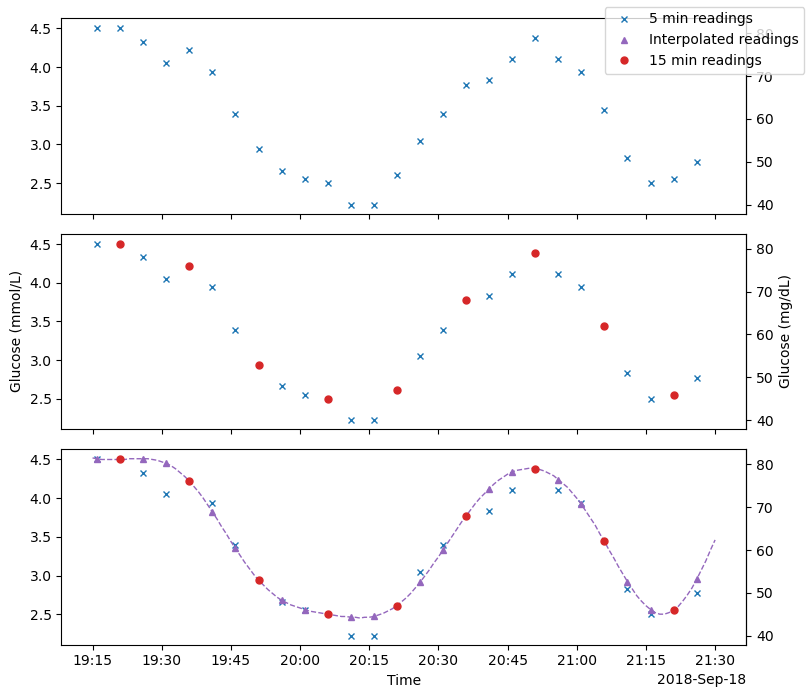

In [25]:
#sub_df = df[(df.ID=='2028_baseline') & (df.time>='2018-03-08 21:00') & (df.time<='2018-03-09 01:45')]
sub_df = df[(df.ID=='1004_6months') & (df.time>='18/09/2018 19:15') & (df.time<='18/09/2018 21:30')]
#sub_df = df[(df.ID=='2012_6months') & (df.time>='18/09/2018 12:25') & (df.time<='18/09/2018 13:05')]

sub_df_5 = sub_df.dropna(subset=['glc'])
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 7), sharex=True, sharey=True)
# using pchip interpolation to create curve
#ax.plot(sub_df.time, sub_df.pchip, '-', label='pchip interpolation')
# Plotting regular 15 min readings

def mmol2mg(x):
    return x / 0.0555

def mg2mmol(x):
    return x * 0.0555

# ax1
ax1.plot(sub_df_5.time, sub_df_5.glc, 'x', label='5 min readings', 
        markersize= 5)

# ax 2
no_15 = sub_df_5[pd.isnull(sub_df_5.cut_glc)]
ax2.plot(no_15.time, no_15.glc,'x', label='5 min readings', markersize= 5)

ax2.plot(sub_df_5.time, sub_df_5.cut_glc, marker='o', color='C3', linestyle='None',
        label='15 min readings', markersize=5)


# ax 3
ax3.plot(no_15.time, no_15.glc, 'x', label='5 min readings', markersize= 5)


ax3.plot(sub_df.time, sub_df.polynomial_5, linestyle='--', color='C4', 
         linewidth=1)
ax3.plot(no_15.time, no_15.polynomial_5, linestyle='None', marker='^',
         color='C4', label='Interpolated readings', markersize= 4)
ax3.plot(sub_df_5.time, sub_df_5.cut_glc, linestyle='None',marker='o', color='C3',
        label='15 min readings', markersize=5)

handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels) #, loc='upper center')

# Lines to show hypo and hyper-glycemia
for ax in ax1, ax2, ax3:
    secax = ax.secondary_yaxis('right', functions=(mmol2mg, mg2mmol))
    if ax == ax2:
        secax.set_ylabel('Glucose (mg/dL)')
    '''ax.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
             xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
    ax.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
               xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')'''

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)


ax2.set_ylabel('Glucose (mmol/L)')
ax3.set_xlabel('Time')
fig.tight_layout()
fig.savefig('figure1-bigger')

In [110]:
def create_ax(sub_df, ax, method, colour, line2=True):
    sub_df_5 = sub_df.dropna(subset=['glc'])
    no_15 = sub_df_5[pd.isnull(sub_df_5.cut_glc)]
    ax.plot(no_15.time, no_15.glc,'x', label='5 min readings', markersize= 5)

    ax.plot(sub_df.time, sub_df[method], linestyle='--', color=colour, linewidth=1)
    ax.plot(no_15.time, no_15[method], marker='^', color=colour, linestyle='None',
       markersize=4, label='Interpolated readings')
    ax.plot(sub_df_5.time, sub_df_5.cut_glc, marker='o', color='C3', linestyle='None',
        label='15 min readings', markersize=5)

    # Lines to show hypo and hyper-glycemia
    ax.hlines(y=3.9, color='tab:gray', linestyles='dotted', xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='Level 1 hypo')
    if line2==True:
        ax.hlines(y=3, color='tab:gray', linestyles='dotted',xmin=sub_df.time.min(), 
               xmax=sub_df.time.max(), label='Lv2 hypo')

    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    #ax.legend()
    ax.set_ylabel('Glucose (mmol/L)')
    ax.set_xlabel('Time')
    return ax

In [148]:
sub_dfs = [df[(df.ID=='1007_baseline') & (df.time>='2018-01-11 20:40') & (df.time<='2018-01-11 21:05')],
            df[(df.ID=='2003_6months') & (df.time>='2018-09-13 19:20') & (df.time<='2018-09-13 19:55')], #lv1 FP
            df[(df.ID=='1030_baseline') & (df.time>='13/03/2018 14:15') & (df.time<='13/03/2018 14:48')], # lv2 fn
            df[(df.ID=='1040_6months') & (df.time>='2018-12-05 11:40') & (df.time<='2018-12-05 12:40')],
            #df[(df.ID=='2028_baseline') & (df.time>='2018-03-08 21:00') & (df.time<='2018-03-09 01:45')], # lv2 fp
           #df[(df.ID=='1034_6months') & (df.time>='2019-01-19 10:30') & (df.time<='2019-01-19 12:05')],
           df[(df.ID=='2032_baseline') & (df.time>='2018-03-23 14:50') & (df.time<='2018-03-23 15:20')],
           df[(df.ID=='1013_6months') & (df.time>='2018-09-22 19:20') & (df.time<='2018-09-22 22:00')],
            ] 


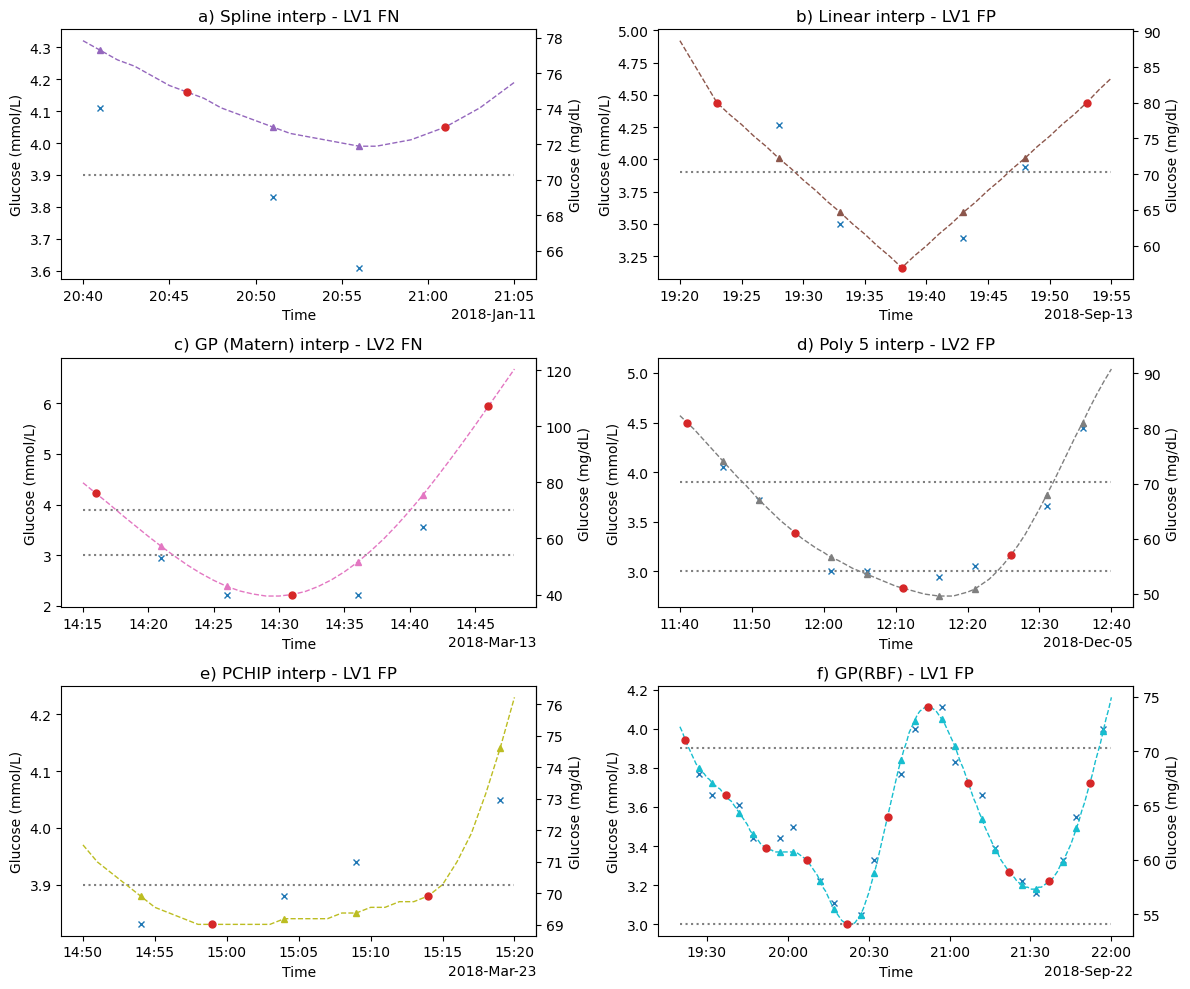

In [149]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(12, 10))
ax1 = create_ax(sub_dfs[0], ax1, 'cubicspline', 'C4', False)
ax1.set_title('a) Spline interp - LV1 FN')
ax2 = create_ax(sub_dfs[1], ax2, 'linear', 'C5', False)
ax2.set_title('b) Linear interp - LV1 FP')
ax3 = create_ax(sub_dfs[2], ax3, 'matern', 'C6', True)
ax3.set_title('c) GP (Matern) interp - LV2 FN')
ax4 = create_ax(sub_dfs[3], ax4, 'polynomial_5', 'C7', True)
ax4.set_title('d) Poly 5 interp - LV2 FP')
ax5 = create_ax(sub_dfs[4], ax5, 'pchip', 'C8',False)
ax5.set_title('e) PCHIP interp - LV1 FP')
ax6 = create_ax(sub_dfs[5], ax6, 'rbf', 'C9',True)
ax6.set_title('f) GP(RBF) - LV1 FP')

for ax in ax1, ax2, ax3, ax4, ax5, ax6:
    secax = ax.secondary_yaxis('right', functions=(mmol2mg, mg2mmol))
    secax.set_ylabel('Glucose (mg/dL)')
fig.tight_layout()
fig.savefig('fn_tp_examples.png')

In [136]:
sub_df = df[(df.ID=='2028_baseline') & (df.time>='2018-03-08 21:00') & (df.time<='2018-03-09 01:45')]

sub_df1 = df_1min[(df_1min.ID=='2028_baseline') & 
                  (df_1min.time>='2018-03-08 21:00') & 
                  (df_1min.time<='2018-03-09 01:45')]

# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
#ax.plot(sub_df.time, sub_df.pchip, '-', label='pchip interpolation')
# Plotting regular 15 min readings
ax.plot(sub_df1.time, sub_df1.glc_spline, 'b--')
        
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 5)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/2028_baseline_double_hypo_missed.png')
#fig.show()

NameError: name 'df_1min' is not defined

In [34]:
sub_df = df[(df.ID=='1004_6months') & (df.time>='18/09/2018 19:15') & (df.time<='18/09/2018 21:45')]
sub_df1 = df_1min[(df_1min.ID=='1004_6months') & (df_1min.time>='18/09/2018 19:15') & (df_1min.time<='18/09/2018 21:45')]

sub_df = 

# set up matplotlib object
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 5))
# using pchip interpolation to create curve
#ax.plot(sub_df.time, sub_df.pchip, '-', label='pchip interpolation')
# Plotting regular 15 min readings

ax1.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 5)
# Plotting irregular flash readings
ax2.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)

ax3.plot(sub_df1.time, sub_df1.cubicspline, 'b--')
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/1004_6months_double_hypo_missed.png')
#fig.show()

SyntaxError: invalid syntax (<ipython-input-34-13ef8d5f5946>, line 4)

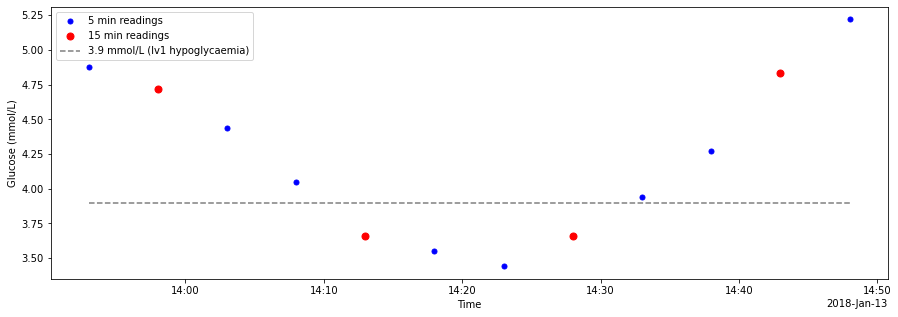

In [17]:
sub_df = df[(df.ID=='1003_baseline') & (df.time>='2018-01-13 13:50') & (df.time<='2018-01-13 14:50')]
#sub_df1 = df_1min[(df_1min.ID=='1004_6months') & (df_1min.time>='18/09/2018 19:15') & (df_1min.time<='18/09/2018 21:45')]

# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
#ax.plot(sub_df.time, sub_df.pchip, '-', label='pchip interpolation')
# Plotting regular 15 min readings
#ax.plot(sub_df1.time, sub_df1.glc_spline, 'b--')
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 5)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
'''plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')'''

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/1003_baseline_demo_hypo_15.png')
#fig.show()

## 0 hypos 15 min, 1 hypo 5 min

In [39]:
sub_df

Empty DataFrame
Columns: [Unnamed: 0, ID, time, glc, cut_glc, pchip, linear, cubicspline, akima, polynomial_3, polynomial_5, polynomial_7, polynomial_9, timestamp, matern, rbf900, rq, rbf]
Index: []

Text(0.5, 0, 'Time')

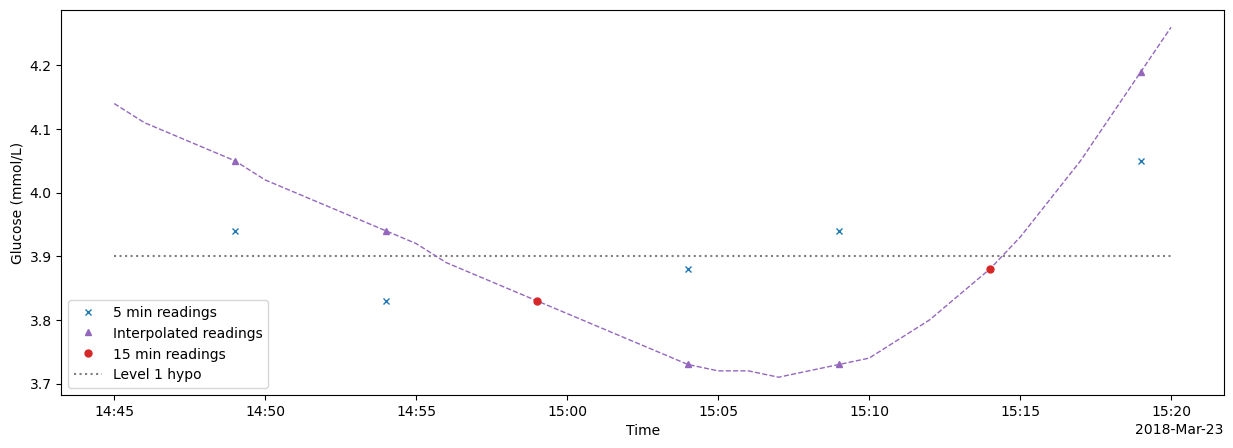

In [58]:
sub_df = df[(df.ID=='2032_baseline') & (df.time>='23/03/2018 14:45') & (df.time<='23/03/2018 15:20')]
sub_df_5 = sub_df.dropna(subset=['glc'])

# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))

no_15 = sub_df_5[pd.isnull(sub_df_5.cut_glc)]
ax.plot(no_15.time, no_15.glc,'x', label='5 min readings', markersize= 5)



ax.plot(sub_df.time, sub_df.matern, linestyle='--', color='C4', linewidth=1)
ax.plot(no_15.time, no_15.matern, marker='^', color='C4', linestyle='None',
       markersize=4, label='Interpolated readings')
ax.plot(sub_df_5.time, sub_df_5.cut_glc, marker='o', color='C3', linestyle='None',
        label='15 min readings', markersize=5)
# Lines to show hypo and hyper-glycemia
ax.hlines(y=3.9, color='tab:gray', linestyles='dotted', xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='Level 1 hypo')
ax.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='Lv2 hypo')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
#fig.savefig('./Results/Figs/2032_baseline_cut_glc_false_positive.png')
#fig.show()

In [54]:
df[(df.ID=='1001_baseline') & (df.time>='08/01/2018 19:00')]

Empty DataFrame
Columns: [time, glc, ID, cut_glc, glc_linear, glc_pchip, glc_spline, glc_akima, glc_cubic, glc_quadratic, glc_piece_poly, glc_poly_5, glc_poly_3, glc_spline_5, glc_spline_3, cut_glc_linear, cut_glc_pchip, cut_glc_spline, cut_glc_akima, cut_glc_cubic, cut_glc_quadratic, cut_glc_piece_poly, cut_glc_poly_5, cut_glc_poly_3, cut_glc_spline_5, cut_glc_spline_3]
Index: []

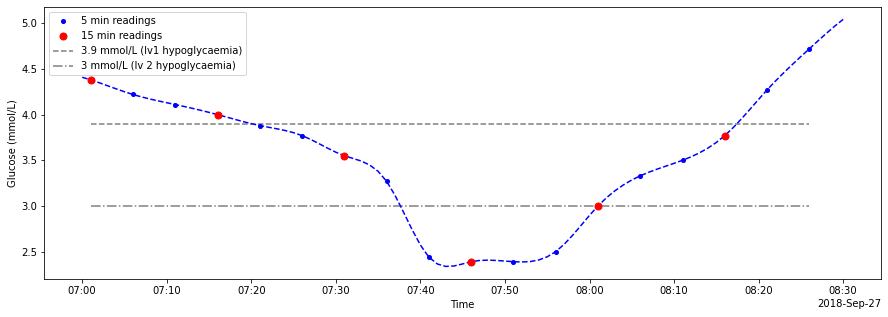

In [357]:
sub_df = df[(df.ID=='1010_6months') & (df.time>='27/09/2018 07:00') & (df.time<='27/09/2018 08:30')]
sub_df1 = df_1min[(df_1min.ID=='1010_6months') & (df_1min.time>='27/09/2018 07:00') & (df_1min.time<='27/09/2018 08:30')]

# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
#ax.plot(sub_df.time, sub_df.pchip, '-', label='pchip interpolation')
# Plotting regular 15 min readings
ax.plot(sub_df1.time, sub_df1.glc_spline, 'b--')

ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)

ax.plot(sub_df1.time, sub_df1.glc_poly_5, 'c-')
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)

# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')


locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/1010_6months_false_negative_lv2.png')
#fig.show()

In [61]:
df[(df.ID=='2028_baseline') & (df.time<='09/03/2018 01:45')]

time    glc             ID  cut_glc  glc_linear  \
155857 2018-03-08 17:22:00   7.10  2028_baseline     7.10        7.10   
155858 2018-03-08 17:27:00   7.33  2028_baseline      NaN        7.33   
155859 2018-03-08 17:32:00   7.44  2028_baseline      NaN        7.44   
155860 2018-03-08 17:37:00   7.27  2028_baseline     7.27        7.27   
155861 2018-03-08 17:42:00   7.21  2028_baseline      NaN        7.21   
155862 2018-03-08 17:47:00   6.60  2028_baseline      NaN        6.60   
155863 2018-03-08 17:52:00   6.05  2028_baseline     6.05        6.05   
155864 2018-03-08 18:52:00   8.05  2028_baseline     8.05        8.05   
155865 2018-03-08 18:57:00   7.55  2028_baseline      NaN        7.55   
155866 2018-03-08 19:02:00   6.99  2028_baseline      NaN        6.99   
155867 2018-03-08 19:07:00   6.60  2028_baseline     6.60        6.60   
155868 2018-03-08 19:12:00   6.44  2028_baseline      NaN        6.44   
155869 2018-03-08 19:17:00   6.33  2028_baseline      NaN        6.33   
155870 2018-03-08 19:22:00   6.22  2028_baseline     6.22        6.22   
155871 2018-03-08 19:27:00   6.10  2028_baseline      NaN        6.10   
155872 2018-03-08 19:32:00   6.83  2028_baseline      NaN        6.83   
155873 2018-03-08 19:37:00   7.27  2028_baseline     7.27        7.27   
155874 2018-03-08 19:42:00   7.88  2028_baseline      NaN        7.88   
155875 2018-03-08 19:47:00   7.94  2028_baseline      NaN        7.94   
155876 2018-03-08 19:52:00   7.99  2028_baseline     7.99        7.99   
155877 2018-03-08 19:57:00   8.55  2028_baseline      NaN        8.55   
155878 2018-03-08 20:02:00   9.05  2028_baseline      NaN        9.05   
155879 2018-03-08 20:07:00   9.27  2028_baseline     9.27        9.27   
155880 2018-03-08 20:12:00   8.82  2028_baseline      NaN        8.82   
155881 2018-03-08 20:17:00   7.99  2028_baseline      NaN        7.99   
155882 2018-03-08 20:22:00   7.16  2028_baseline     7.16        7.16   
155883 2018-03-08 20:27:00   6.71  2028_baseline      NaN        6.71   
155884 2018-03-08 20:32:00   6.49  2028_baseline      NaN        6.49   
155885 2018-03-08 20:37:00   6.38  2028_baseline     6.38        6.38   
155886 2018-03-08 20:42:00   6.16  2028_baseline      NaN        6.16   
155887 2018-03-08 20:47:00   5.99  2028_baseline      NaN        5.99   
155888 2018-03-08 20:57:00   5.49  2028_baseline     5.49        5.49   
155889 2018-03-08 21:02:00   5.05  2028_baseline      NaN        5.05   
155890 2018-03-08 21:07:00   4.55  2028_baseline      NaN        4.55   
155891 2018-03-08 21:12:00   4.16  2028_baseline     4.16        4.16   
155892 2018-03-08 21:17:00   3.83  2028_baseline      NaN        3.83   
155893 2018-03-08 21:22:00   3.50  2028_baseline      NaN        3.50   
155894 2018-03-08 21:27:00   2.39  2028_baseline     2.39        2.39   
155895 2018-03-08 21:32:00   2.22  2028_baseline      NaN        2.22   
155896 2018-03-08 21:37:00   2.22  2028_baseline      NaN        2.22   
155897 2018-03-08 21:42:00   2.22  2028_baseline     2.22        2.22   
155898 2018-03-08 21:47:00   2.22  2028_baseline      NaN        2.22   
155899 2018-03-08 21:52:00   2.22  2028_baseline      NaN        2.22   
155900 2018-03-08 21:57:00   2.22  2028_baseline     2.22        2.22   
155901 2018-03-08 22:02:00   2.22  2028_baseline      NaN        2.22   
155902 2018-03-08 22:07:00   2.22  2028_baseline      NaN        2.22   
155903 2018-03-08 22:12:00   2.22  2028_baseline     2.22        2.22   
155904 2018-03-08 22:17:00   2.22  2028_baseline      NaN        2.22   
155905 2018-03-08 22:22:00   2.44  2028_baseline      NaN        2.44   
155906 2018-03-08 22:27:00   3.27  2028_baseline     3.27        3.27   
155907 2018-03-08 22:32:00   4.00  2028_baseline      NaN        4.00   
155908 2018-03-08 22:37:00   4.44  2028_baseline      NaN        4.44   
155909 2018-03-08 22:42:00   4.66  2028_baseline     4.66        4.66   
155910 2018-03-08 22:47:00   4.33  2028_baseline      NaN        4.33   
155911 

In [372]:
import matplotlib.animation as animation

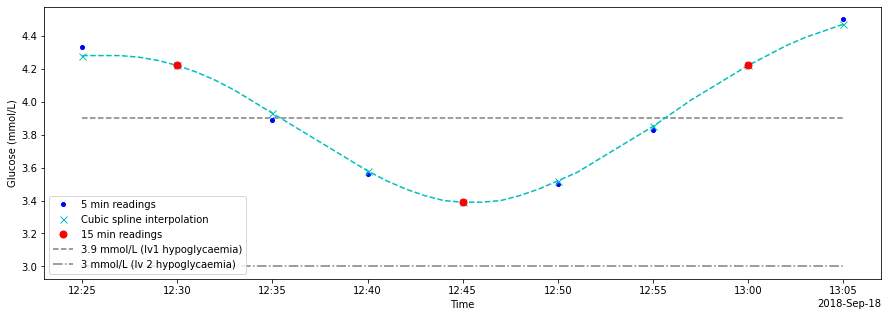

In [385]:
sub_df = df[(df.ID=='2012_6months') & (df.time>='18/09/2018 12:25') & (df.time<='18/09/2018 13:05')]
sub_df1 = df_1min[(df_1min.ID=='2012_6months') & (df_1min.time>='18/09/2018 12:25') & (df_1min.time<='18/09/2018 13:05')]

# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
#ax.plot(sub_df.time, sub_df.pchip, '-', label='pchip interpolation')
# Plotting regular 15 min readings
#ax.plot(sub_df1.time, sub_df1.glc_spline, 'b--')

ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)

x = sub_df1.time
y = sub_df1.cut_glc_spline

line, = ax.plot(x, y, 'c--')
ax.plot(sub_df.time, sub_df.cut_glc_spline,'cx', label='Cubic spline interpolation', 
        markersize= 7)

# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')




def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    return line,



locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/2012_6months_interp_TP_lv1_only.png')

#fig.show()

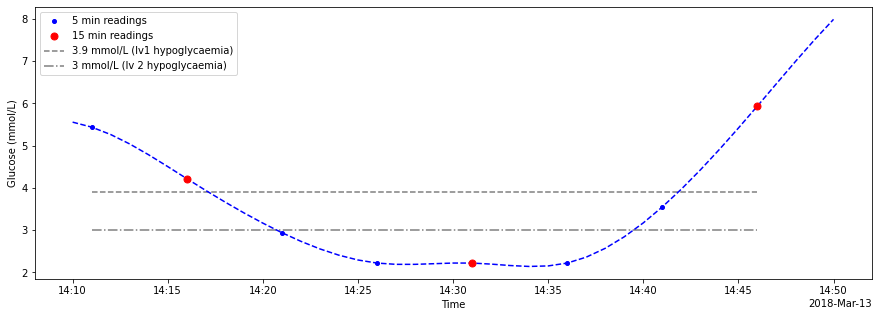

In [362]:
sub_df = df[(df.ID=='1030_baseline') & (df.time>='13/03/2018 14:10') & (df.time<='13/03/2018 14:50')]
sub_df1 = df_1min[(df_1min.ID=='1030_baseline') & (df_1min.time>='13/03/2018 14:10') & (df_1min.time<='13/03/2018 14:50')]

# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
#ax.plot(sub_df.time, sub_df.pchip, '-', label='pchip interpolation')
# Plotting regular 15 min readings
ax.plot(sub_df1.time, sub_df1.glc_spline, 'b--')
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
#fig.savefig('./Results/Figs/1030_baseline_FN_lv1&lv2.png')
#fig.show()

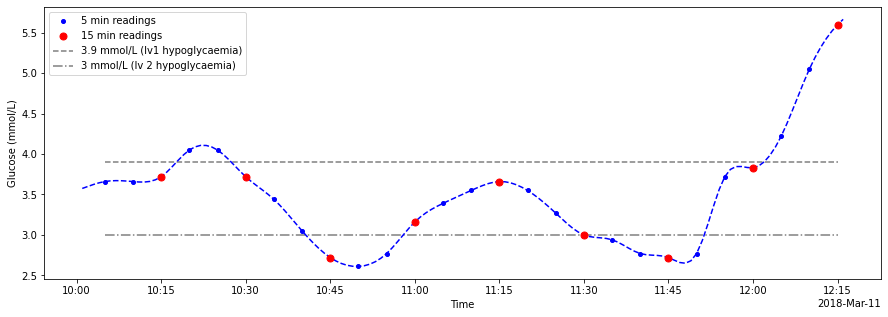

In [365]:
sub_df = df[(df.ID=='2024_baseline') & (df.time>='2018-03-11 10:01') & (df.time<='2018-03-11 12:16')]

sub_df1 = df_1min[(df_1min.ID=='2024_baseline') & 
                  (df_1min.time>='2018-03-11 10:01') & 
                  (df_1min.time<='2018-03-11 12:16')]

# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
#ax.plot(sub_df.time, sub_df.pchip, '-', label='pchip interpolation')
ax.plot(sub_df1.time, sub_df1.glc_spline, 'b--')

ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/2024_baseline_fn_lv2_2hyposmissed.png')
#fig.show()

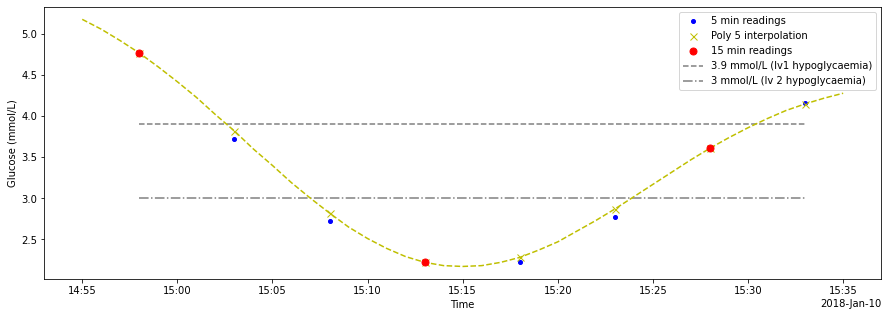

In [389]:
sub_df = df[(df.ID=='1003_baseline') & (df.time>='2018-01-10 14:55') & (df.time<='2018-01-10 15:35')]
sub_df1 = df_1min[(df_1min.ID=='1003_baseline') & (df_1min.time>='2018-01-10 14:55') & 
                  (df_1min.time<='2018-01-10 15:35')]

# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
ax.plot(sub_df1.time, sub_df1.cut_glc_poly_5, 'y--')
# Plotting regular 15 min readings
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)
ax.plot(sub_df.time, sub_df.cut_glc_poly_5,'yx', label='Poly 5 interpolation', 
        markersize= 7)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figur
fig.savefig('./Results/Figs/1003_baseline_interp_tp_lv2_only.png')
#fig.show()

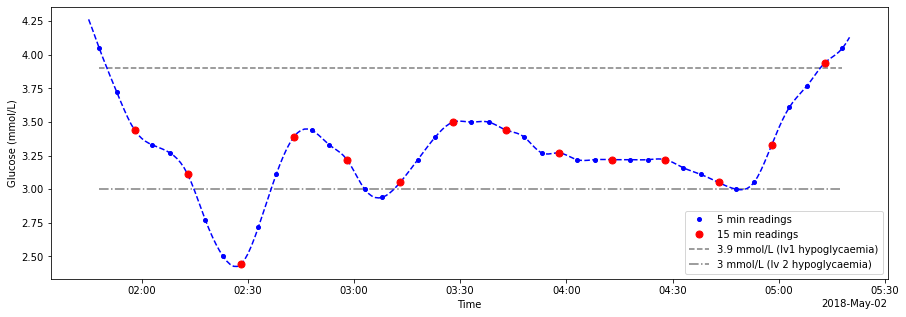

In [370]:
sub_df = df[(df.ID=='2040_baseline') & (df.time>='2018-05-02 01:45') & (df.time<='2018-05-02 05:20')]
sub_df1 = df_1min[(df_1min.ID=='2040_baseline') & (df_1min.time>='2018-05-02 01:45') & (df_1min.time<='2018-05-02 05:20')]

# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
#ax.plot(sub_df.time, sub_df.pchip, '-', label='pchip interpolation')
# Plotting regular 15 min readings
ax.plot(sub_df1.time, sub_df1.glc_spline, 'b--')

ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/2040_baseline_lv2_fn.png')
#fig.show()

# Interp methods

In [139]:
df_1min = pd.read_csv('./dexcom_data_1_min_interpolated.csv')

In [226]:
df_1min.head()
df_1min[cols] = df_1min[cols].round(2)

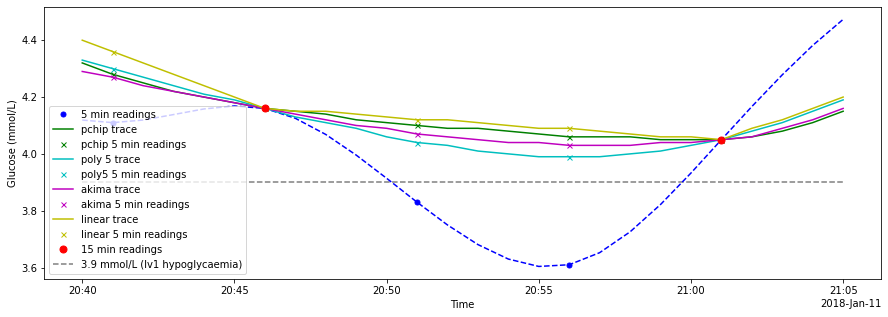

In [319]:
sub_df = df_1min[(df_1min.ID=='1007_baseline') & (df_1min.time>='2018-01-11 20:40') & (df_1min.time<='2018-01-11 21:05')]
# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))

sub_5min = sub_df.dropna(subset=['glc'])

ax.plot(sub_5min.time, sub_5min.glc,'bo', label='5 min readings', 
        markersize= 5)
ax.plot(sub_df.time, sub_df.glc_spline, 'b--')

ax.plot(sub_df.time, sub_df.cut_glc_pchip, 'g-', label='pchip trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_pchip,'gx', label='pchip 5 min readings', 
        markersize= 5)

ax.plot(sub_df.time, sub_df.cut_glc_poly_5, 'c-', label='poly 5 trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_poly_5,'cx', label='poly5 5 min readings', 
        markersize= 5)

ax.plot(sub_df.time, sub_df.cut_glc_akima, 'm-', label='akima trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_akima,'mx', label='akima 5 min readings', 
        markersize= 5)

ax.plot(sub_df.time, sub_df.cut_glc_linear, 'y-', label='linear trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_linear,'yx', label='linear 5 min readings', 
        markersize= 5)

# Plotting regular 15 min reading


# pchip

# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)

# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
'''plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')'''


# ticks
#ax.xaxis.set_minor_locator(hours)

'''ax.xaxis.set_major_locator(MultipleLocator(20))
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(h_fmt)'''

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/1007_baselines_interp_FN_lv1.png')
#fig.show()

In [243]:
sub_df

Empty DataFrame
Columns: [time, glc, ID, cut_glc, glc_linear, glc_pchip, glc_spline, glc_akima, glc_poly_5, glc_poly_3, cut_glc_linear, cut_glc_pchip, cut_glc_spline, cut_glc_akima, cut_glc_poly_5, cut_glc_poly_3]
Index: []

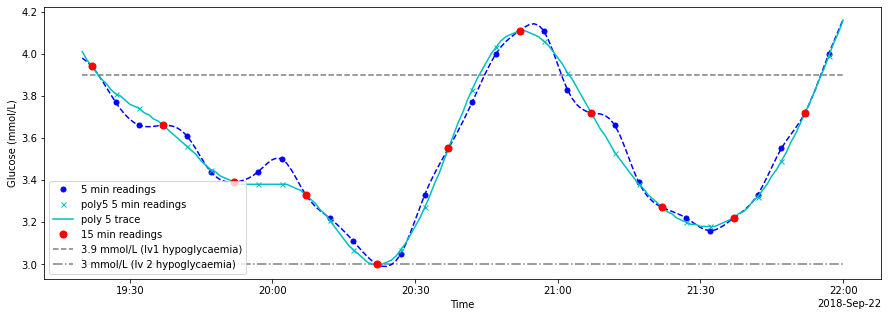

In [320]:
#sub_df = df_1min[(df_1min.ID=='1007_baseline') & (df_1min.time>='2018-01-11 20:40') & (df_1min.time<='2018-01-11 21:05')]
# set up matplotlib object
sub_df = df_1min[(df_1min.ID=='1013_6months') & 
                 (df_1min.time>='2018-09-22 19:20') & 
                 (df_1min.time<='2018-09-22 22:00')]

fig, ax = plt.subplots(figsize=(15, 5))

sub_5min = sub_df.dropna(subset=['glc'])

ax.plot(sub_df.time, sub_df.glc_spline, 'b--')

'''ax.plot(sub_df.time, sub_df.cut_glc_pchip, 'g-', label='pchip')

ax.plot(sub_df.time, sub_df.cut_glc_akima, 'm-', label='akima')
ax.plot(sub_df.time, sub_df.cut_glc_linear, 'y-', label='linear')
'''
# Plotting regular 15 min readings
ax.plot(sub_5min.time, sub_5min.glc,'bo', label='5 min readings', 
        markersize= 5)



# pchip
'''ax.plot(sub_5min.time, sub_5min.cut_glc_pchip,'gx', label='pchip 5 min readings', 
        markersize= 5)'''
ax.plot(sub_5min.time, sub_5min.cut_glc_poly_5,'cx', label='poly5 5 min readings', 
        markersize= 5)
ax.plot(sub_df.time, sub_df.cut_glc_poly_5, 'c-', label='poly 5 trace')
'''ax.plot(sub_5min.time, sub_5min.cut_glc_linear,'yx', label='linear 5 min readings', 
        markersize= 5)

ax.plot(sub_5min.time, sub_5min.cut_glc_akima,'mx', label='akima 5 min readings', 
        markersize= 5)'''
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)


# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')


# ticks
#ax.xaxis.set_minor_locator(hours)

'''ax.xaxis.set_major_locator(MultipleLocator(20))
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(h_fmt)'''

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/1013_6months_interp_FP_lv1_2_hypos_from_1.png')
#fig.show()

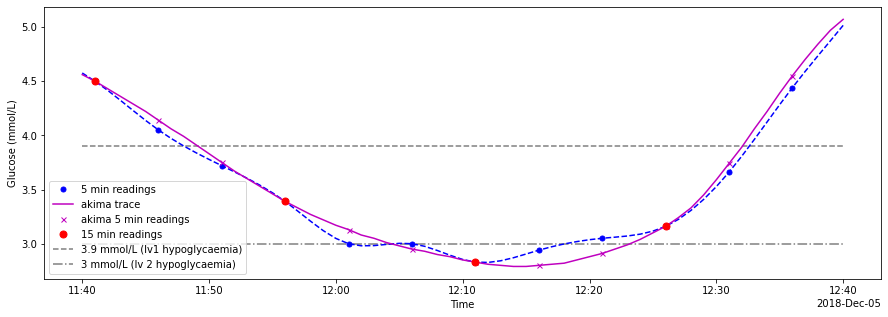

In [321]:
#sub_df = df_1min[(df_1min.ID=='1007_baseline') & (df_1min.time>='2018-01-11 20:40') & (df_1min.time<='2018-01-11 21:05')]
# set up matplotlib object
sub_df = df_1min[(df_1min.ID=='1040_6months') & 
                 (df_1min.time>='2018-12-05 11:40') & 
                 (df_1min.time<='2018-12-05 12:40')]

fig, ax = plt.subplots(figsize=(15, 5))

sub_5min = sub_df.dropna(subset=['glc'])

ax.plot(sub_df.time, sub_df.glc_spline, 'b--')

'''ax.plot(sub_df.time, sub_df.cut_glc_pchip, 'g-', label='pchip')
ax.plot(sub_df.time, sub_df.cut_glc_poly_5, 'c-', label='poly 5')
ax.plot(sub_df.time, sub_df.cut_glc_linear, 'y-', label='linear')
'''
# Plotting regular 15 min readings
ax.plot(sub_5min.time, sub_5min.glc,'bo', label='5 min readings', 
        markersize= 5)
ax.plot(sub_df.time, sub_df.cut_glc_akima, 'm-', label='akima trace')



# pchip
'''
ax.plot(sub_5min.time, sub_5min.cut_glc_pchip,'gx', label='pchip 5 min readings', 
        markersize= 5)

ax.plot(sub_5min.time, sub_5min.cut_glc_poly_5,'cx', label='poly5 5 min readings', 
        markersize= 5)
ax.plot(sub_5min.time, sub_5min.cut_glc_linear,'yx', label='linear 5 min readings', 
        markersize= 5)
'''
ax.plot(sub_5min.time, sub_5min.cut_glc_akima,'mx', label='akima 5 min readings', 
        markersize= 5)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)


# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')


# ticks
#ax.xaxis.set_minor_locator(hours)

'''ax.xaxis.set_major_locator(MultipleLocator(20))
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(h_fmt)'''

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/1013_6months_interp_FP_lv2.png')
#fig.show()

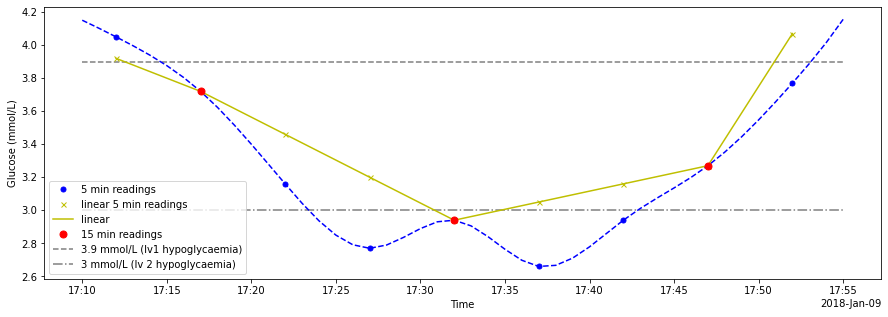

In [337]:
#sub_df = df_1min[(df_1min.ID=='1007_baseline') & (df_1min.time>='2018-01-11 20:40') & (df_1min.time<='2018-01-11 21:05')]
# set up matplotlib object
sub_df = df_1min[(df_1min.ID=='1008_baseline') & 
                 (df_1min.time>='2018-01-09 17:10') & 
                 (df_1min.time<='2018-01-09 17:55')]

fig, ax = plt.subplots(figsize=(15, 5))

sub_5min = sub_df.dropna(subset=['glc'])

ax.plot(sub_df.time, sub_df.glc_spline, 'b--')
#ax.plot(sub_df.time, sub_df.cut_glc_akima, 'm-', label='akima')

#ax.plot(sub_df.time, sub_df.cut_glc_pchip, 'g-', label='pchip')
#ax.plot(sub_df.time, sub_df.cut_glc_poly_5, 'c-', label='poly 5')


# Plotting regular 15 min readings
ax.plot(sub_5min.time, sub_5min.glc,'bo', label='5 min readings', 
        markersize= 5)



# pchip
'''
ax.plot(sub_5min.time, sub_5min.cut_glc_pchip,'gx', label='pchip 5 min readings', 
        markersize= 5)

ax.plot(sub_5min.time, sub_5min.cut_glc_poly_5,'cx', label='poly5 5 min readings', 
        markersize= 5)
'''
ax.plot(sub_5min.time, sub_5min.cut_glc_linear,'yx', label='linear 5 min readings', 
        markersize= 5)

'''ax.plot(sub_5min.time, sub_5min.cut_glc_akima,'mx', label='akima 5 min readings', 
        markersize= 5)'''

ax.plot(sub_5min.time, sub_5min.cut_glc_linear, 'y-', label='linear')
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)


# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')


# ticks
#ax.xaxis.set_minor_locator(hours)

'''ax.xaxis.set_major_locator(MultipleLocator(20))
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(h_fmt)'''

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/1008_baseline_interp_FN_lv2.png')
#fig.show()

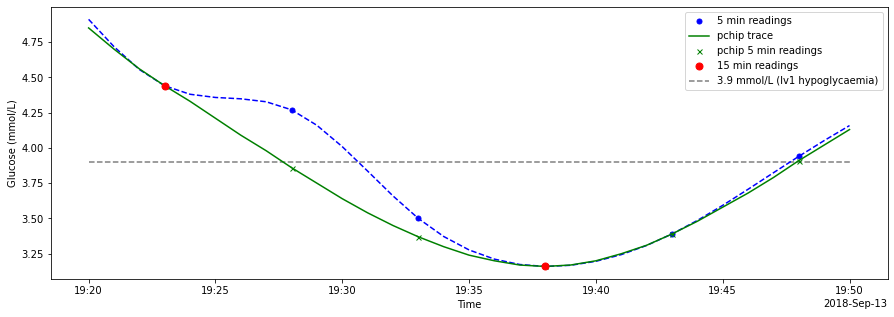

In [344]:
sub_df = df_1min[(df_1min.ID=='2003_6months') & (df_1min.time>='2018-09-13 19:20') & 
                 (df_1min.time<='2018-09-13 19:50')]
# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))

sub_5min = sub_df.dropna(subset=['glc'])

ax.plot(sub_5min.time, sub_5min.glc,'bo', label='5 min readings', 
        markersize= 5)
#ax.plot(sub_df.time, sub_df.glc_spline, 'b--')

ax.plot(sub_df.time, sub_df.cut_glc_pchip, 'g-', label='pchip trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_pchip,'gx', label='pchip 5 min readings', 
        markersize= 5)
'''

ax.plot(sub_df.time, sub_df.cut_glc_poly_5, 'c-', label='poly 5 trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_poly_5,'cx', label='poly5 5 min readings', 
        markersize= 5)'''

'''ax.plot(sub_df.time, sub_df.cut_glc_akima, 'm-', label='akima trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_akima,'mx', label='akima 5 min readings', 
        markersize= 5)'''

'''ax.plot(sub_df.time, sub_df.cut_glc_linear, 'y-', label='linear trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_linear,'yx', label='linear 5 min readings', 
        markersize= 5)'''

# Plotting regular 15 min reading


# pchip

# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)

# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
'''plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')'''


# ticks
#ax.xaxis.set_minor_locator(hours)

'''ax.xaxis.set_major_locator(MultipleLocator(20))
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(h_fmt)'''

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/2003_6months_interp_FP_lv1.png')
#fig.show()

In [ ]:
sub_df = df_1min[(df_1min.ID=='2039_baseline') & (df_1min.time>='2018-04-19 16:00') & 
                 (df_1min.time<='2018-04-19 16:35')]
# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))

sub_5min = df[(df.ID=='1046_baseline') & (df.time>='2018-04-09 22:30') & 
                 (df.time<='2018-04-10 03:00')]

ax.plot(sub_5min.time, sub_5min.glc,'bo', label='5 min readings', 
        markersize= 5)
ax.plot(sub_df.time, sub_df.glc_spline, 'b--')

ax.plot(sub_df.time, sub_df.cut_glc_pchip, 'g-', label='pchip trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_pchip,'gx', label='pchip 5 min readings', 
        markersize= 5)
'''

ax.plot(sub_df.time, sub_df.cut_glc_poly_5, 'c-', label='poly 5 trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_poly_5,'cx', label='poly5 5 min readings', 
        markersize= 5)'''

'''ax.plot(sub_df.time, sub_df.cut_glc_akima, 'm-', label='akima trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_akima,'mx', label='akima 5 min readings', 
        markersize= 5)'''

ax.plot(sub_df.time, sub_df.cut_glc_linear, 'y-', label='linear trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_linear,'yx', label='linear 5 min readings', 
        markersize= 5)

# Plotting regular 15 min reading


# pchip

# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)

# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')


# ticks
#ax.xaxis.set_minor_locator(hours)

'''ax.xaxis.set_major_locator(MultipleLocator(20))
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(h_fmt)'''

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/1046_baseline_interp_FP_lv2.png')
#fig.show()

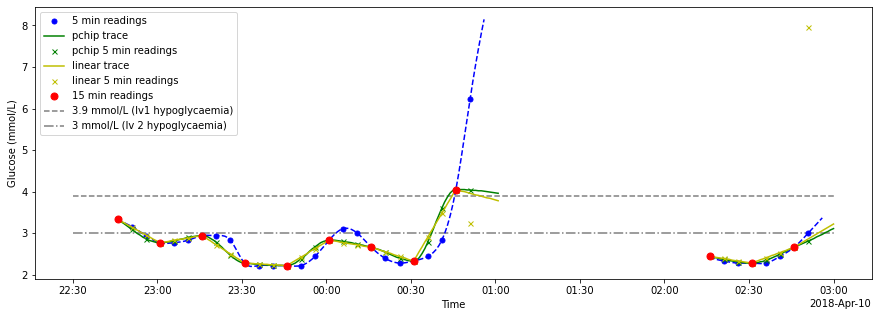

In [340]:
sub_df = df_1min[(df_1min.ID=='1046_baseline') & (df_1min.time>='2018-04-09 22:30') & 
                 (df_1min.time<='2018-04-10 03:00')]
# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))

sub_5min = df[(df.ID=='1046_baseline') & (df.time>='2018-04-09 22:30') & 
                 (df.time<='2018-04-10 03:00')]

ax.plot(sub_5min.time, sub_5min.glc,'bo', label='5 min readings', 
        markersize= 5)
ax.plot(sub_df.time, sub_df.glc_spline, 'b--')

ax.plot(sub_df.time, sub_df.cut_glc_pchip, 'g-', label='pchip trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_pchip,'gx', label='pchip 5 min readings', 
        markersize= 5)
'''

ax.plot(sub_df.time, sub_df.cut_glc_poly_5, 'c-', label='poly 5 trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_poly_5,'cx', label='poly5 5 min readings', 
        markersize= 5)'''

'''ax.plot(sub_df.time, sub_df.cut_glc_akima, 'm-', label='akima trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_akima,'mx', label='akima 5 min readings', 
        markersize= 5)'''

ax.plot(sub_df.time, sub_df.cut_glc_linear, 'y-', label='linear trace')
ax.plot(sub_5min.time, sub_5min.cut_glc_linear,'yx', label='linear 5 min readings', 
        markersize= 5)

# Plotting regular 15 min reading


# pchip

# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)

# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')


# ticks
#ax.xaxis.set_minor_locator(hours)

'''ax.xaxis.set_major_locator(MultipleLocator(20))
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(h_fmt)'''

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/1046_baseline_interp_FN_lv1_2to1.png')
#fig.show()

In [336]:
sub_df

time   glc             ID  cut_glc  glc_linear  \
487315 2018-04-09 22:30:00   NaN  1046_baseline      NaN         NaN   
487316 2018-04-09 22:31:00   NaN  1046_baseline      NaN         NaN   
487317 2018-04-09 22:32:00   NaN  1046_baseline      NaN         NaN   
487318 2018-04-09 22:33:00   NaN  1046_baseline      NaN         NaN   
487319 2018-04-09 22:34:00   NaN  1046_baseline      NaN         NaN   
487320 2018-04-09 22:35:00   NaN  1046_baseline      NaN         NaN   
487321 2018-04-09 22:36:00   NaN  1046_baseline      NaN         NaN   
487322 2018-04-09 22:37:00   NaN  1046_baseline      NaN         NaN   
487323 2018-04-09 22:38:00   NaN  1046_baseline      NaN         NaN   
487324 2018-04-09 22:39:00   NaN  1046_baseline      NaN         NaN   
487325 2018-04-09 22:40:00   NaN  1046_baseline      NaN         NaN   
487326 2018-04-09 22:41:00   NaN  1046_baseline      NaN         NaN   
487327 2018-04-09 22:42:00   NaN  1046_baseline      NaN         NaN   
487328 2018-04-09 22:43:00   NaN  1046_baseline      NaN         NaN   
487329 2018-04-09 22:44:00   NaN  1046_baseline      NaN         NaN   
487330 2018-04-09 22:45:00   NaN  1046_baseline      NaN         NaN   
487331 2018-04-09 22:46:00  3.33  1046_baseline     3.33    3.330000   
487332 2018-04-09 22:47:00   NaN  1046_baseline      NaN    3.296000   
487333 2018-04-09 22:48:00   NaN  1046_baseline      NaN    3.262000   
487334 2018-04-09 22:49:00   NaN  1046_baseline      NaN    3.228000   
487335 2018-04-09 22:50:00   NaN  1046_baseline      NaN    3.194000   
487336 2018-04-09 22:51:00  3.16  1046_baseline      NaN    3.160000   
487337 2018-04-09 22:52:00   NaN  1046_baseline      NaN    3.116000   
487338 2018-04-09 22:53:00   NaN  1046_baseline      NaN    3.072000   
487339 2018-04-09 22:54:00   NaN  1046_baseline      NaN    3.028000   
487340 2018-04-09 22:55:00   NaN  1046_baseline      NaN    2.984000   
487341 2018-04-09 22:56:00  2.94  1046_baseline      NaN    2.940000   
487342 2018-04-09 22:57:00   NaN  1046_baseline      NaN    2.906000   
487343 2018-04-09 22:58:00   NaN  1046_baseline      NaN    2.872000   
487344 2018-04-09 22:59:00   NaN  1046_baseline      NaN    2.838000   
487345 2018-04-09 23:00:00   NaN  1046_baseline      NaN    2.804000   
487346 2018-04-09 23:01:00  2.77  1046_baseline     2.77    2.770000   
487347 2018-04-09 23:02:00   NaN  1046_baseline      NaN    2.770000   
487348 2018-04-09 23:03:00   NaN  1046_baseline      NaN    2.770000   
487349 2018-04-09 23:04:00   NaN  1046_baseline      NaN    2.770000   
487350 2018-04-09 23:05:00   NaN  1046_baseline      NaN    2.770000   
487351 2018-04-09 23:06:00  2.77  1046_baseline      NaN    2.770000   
487352 2018-04-09 23:07:00   NaN  1046_baseline      NaN    2.782000   
487353 2018-04-09 23:08:00   NaN  1046_baseline      NaN    2.794000   
487354 2018-04-09 23:09:00   NaN  1046_baseline      NaN    2.806000   
487355 2018-04-09 23:10:00   NaN  1046_baseline      NaN    2.818000   
487356 2018-04-09 23:11:00  2.83  1046_baseline      NaN    2.830000   
487357 2018-04-09 23:12:00   NaN  1046_baseline      NaN    2.852000   
487358 2018-04-09 23:13:00   NaN  1046_baseline      NaN    2.874000   
487359 2018-04-09 23:14:00   NaN  1046_baseline      NaN    2.896000   
487360 2018-04-09 23:15:00   NaN  1046_baseline      NaN    2.918000   
487361 2018-04-09 23:16:00  2.94  1046_baseline     2.94    2.940000   
487362 2018-04-09 23:17:00   NaN  1046_baseline      NaN    2.940000   
487363 2018-04-09 23:18:00   NaN  1046_baseline      NaN    2.940000   
487364 2018-04-09 23:19:00   NaN  1046_baseline      NaN    2.940000   
487365 2018-04-09 23:20:00   NaN  1046_baseline      NaN    2.940000   
487366 2018-04-09 23:21:00  2.94  1046_baseline      NaN    2.940000   
487367 2018-04-09 23:22:00   NaN  1046_baseline      NaN    2.918000   
487368 2018-04-09 23:23:00   NaN  1046_baseline      NaN    2.896000   
487369 2018-04-09 23:24:00   NaN  1046_baseline      NaN    2.

Text(0.5, 0, 'Time')

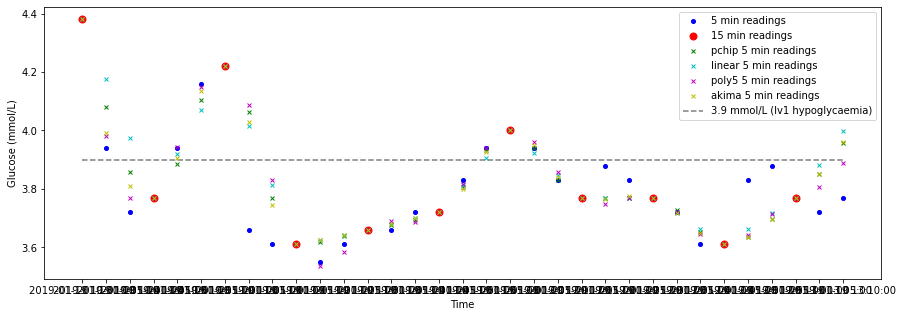

In [272]:
sub_df = df_round[(df_round.ID=='1034_6months') & (df_round.time>='2019-01-19 10:30') & (df_round.time<='2019-01-19 13:15')]
# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
'''ax.plot(sub_df.time, sub_df.cut_glc_pchip, 'g-', label='pchip interpolation')
ax.plot(sub_df.time, sub_df.cut_glc_linear, 'c-', label='linear interpolation')
#ax.plot(sub_df.time, sub_df.glc, 'b-', label='actual')
ax.plot(sub_df.time, sub_df.cut_glc, 'r-', label='no interpolation')
ax.plot(sub_df.time, sub_df.cut_glc_akima, 'y-', label='akima interpolation')
ax.plot(sub_df.time, sub_df.cut_glc_poly_5, 'm-', label='poly5 interpolation')'''

# Plotting regular 15 min readings
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)
# Plotting 15 min readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)

# interp methods
ax.plot(sub_df.time, sub_df.cut_glc_pchip,'gx', label='pchip 5 min readings', 
        markersize= 4)
ax.plot(sub_df.time, sub_df.cut_glc_linear,'cx', label='linear 5 min readings', 
        markersize= 4)
ax.plot(sub_df.time, sub_df.cut_glc_poly_5,'mx', label='poly5 5 min readings', 
        markersize= 4)
ax.plot(sub_df.time, sub_df.cut_glc_akima,'yx', label='akima 5 min readings', 
        markersize= 4)

# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
'''plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')'''

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
#fig.savefig('./Results/Figs/2039_baseline_FP_lv2.svg')
#fig.show()

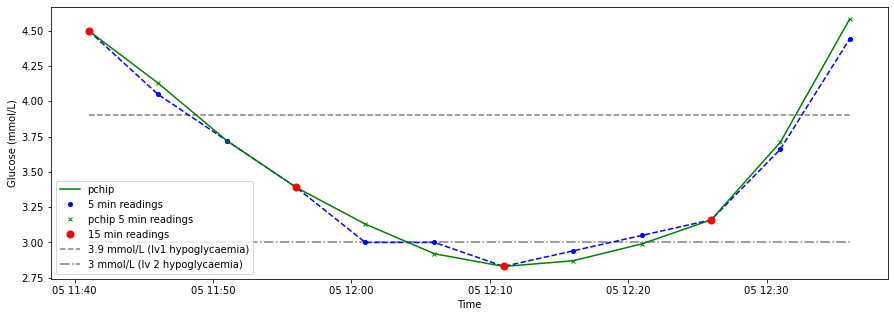

In [316]:
sub_df = df[(df.ID=='1040_6months') & (df.time>='2018-12-05 11:40') & (df.time<='2018-12-05 12:40')]
# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(sub_df.time, sub_df.glc_poly_5, 'b--')
ax.plot(sub_df.time, sub_df.cut_glc_pchip, 'g-', label='pchip')

# Plotting regular 15 min readings
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)


# interp methods
ax.plot(sub_df.time, sub_df.cut_glc_pchip,'gx', label='pchip 5 min readings', 
        markersize= 4)
'''ax.plot(sub_df.time, sub_df.cut_glc_linear,'cx', label='linear 5 min readings', 
        markersize= 4)
ax.plot(sub_df.time, sub_df.cut_glc_poly_5,'mx', label='poly5 5 min readings', 
        markersize= 4)
ax.plot(sub_df.time, sub_df.cut_glc_akima,'yx', label='akima 5 min readings', 
        markersize= 4)'''

# Plotting 15 min readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)

# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--', xmin=sub_df.time.min(),
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.', xmin=sub_df.time.min(),
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
fig.savefig('./Results/Figs/1040_6months_FP_lv2.png')
#fig.show()

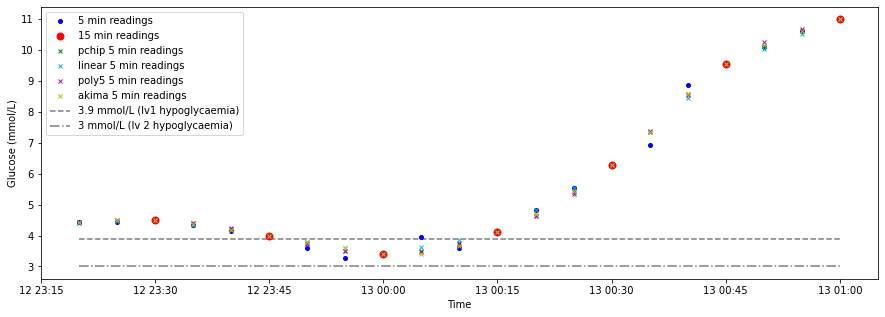

In [121]:
sub_df = df[(df.ID=='2008_baseline') & (df.time>='2018-03-12 23:20') & (df.time<='2018-03-13 01:00')]
# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
'''ax.plot(sub_df.time, sub_df.cut_glc_pchip, 'g-', label='pchip interpolation')
ax.plot(sub_df.time, sub_df.cut_glc_linear, 'c-', label='linear interpolation')
#ax.plot(sub_df.time, sub_df.glc, 'b-', label='actual')
ax.plot(sub_df.time, sub_df.cut_glc, 'r-', label='no interpolation')
ax.plot(sub_df.time, sub_df.cut_glc_akima, 'y-', label='akima interpolation')
ax.plot(sub_df.time, sub_df.cut_glc_poly_5, 'm-', label='poly5 interpolation')'''

# Plotting regular 15 min readings
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)
# Plotting 15 min readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)

# interp methods
ax.plot(sub_df.time, sub_df.cut_glc_pchip,'gx', label='pchip 5 min readings', 
        markersize= 4)
ax.plot(sub_df.time, sub_df.cut_glc_linear,'cx', label='linear 5 min readings', 
        markersize= 4)
ax.plot(sub_df.time, sub_df.cut_glc_poly_5,'mx', label='poly5 5 min readings', 
        markersize= 4)
ax.plot(sub_df.time, sub_df.cut_glc_akima,'yx', label='akima 5 min readings', 
        markersize= 4)

# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
'''plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')'''

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
#fig.savefig('./Results/Figs/2039_baseline_FP_lv2.svg')
#fig.show()

In [ ]:
sub_df = df[(df.ID=='') & (df.time>='') & (df.time<='')]
# set up matplotlib object
fig, ax = plt.subplots(figsize=(15, 5))
# using pchip interpolation to create curve
#ax.plot(sub_df.time, sub_df.pchip, '-', label='pchip interpolation')
# Plotting regular 15 min readings
ax.plot(sub_df.time, sub_df.glc,'bo', label='5 min readings', 
        markersize= 4)
# pchip
ax.plot(sub_df.time, sub_df.cut_glc_pchip,'go', label='pchip 5 min readings', 
        markersize= 4)
# Plotting irregular flash readings
ax.plot(sub_df.time, sub_df.cut_glc,'ro', 
        label='15 min readings', markersize=7)
# Lines to show hypo and hyper-glycemia
plt.hlines(y=3.9, color='tab:gray', linestyles='--',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3.9 mmol/L (lv1 hypoglycaemia)')
plt.hlines(y=3, color='tab:gray', linestyles='-.',xmin=sub_df.time.min(), 
           xmax=sub_df.time.max(), label='3 mmol/L (lv 2 hypoglycaemia)')

ax.legend()
ax.set_ylabel('Glucose (mmol/L)')
ax.set_xlabel('Time')
# Saving figure
#fig.savefig('./Results/Figs/ .svg')
#fig.show()